In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

np.random.seed(0)

## Loading the dataset

In [2]:
df = pd.read_excel(r"C:\Users\abhir\Downloads\Dataset\Dataset.xlsx")
df.head(10)

,Customer ID,Gender,Age,Income,Occupation,Marital Status,No. Family Members,Home Ownership,Home Value,Years in Current Home,...,Total Credit Card Balance,Product ID,Products Purchased,Number of Online Purchases,Average Purchase Value,Last Purchase Value,Days Since Last Purchase,Number of Returns,Total Values of Returns,Locations
0,C001,Female,23,27275,Student,Single,2,Own,442797,13,...,22979,P001,Clothing,8,142.776953,50.131325,29,1,20.110947,Bangalore
1,C002,Female,18,35579,Student,Single,3,Own,182090,17,...,18890,P002,Jewelry,16,152.688423,40.423631,66,4,33.868237,Delhi
2,C003,Male,45,59347,Homemaker,Single,2,Own,973684,12,...,14721,P003,Jewelry,3,115.261674,88.014050,131,4,94.178999,Jaipur
3,C004,Female,19,27105,Student,Married,3,Own,94669,7,...,21491,P004,Books,1,48.428081,192.532891,50,5,51.754754,Nashik
4,C005,Female,45,47566,Homemaker,Single,4,Own,938493,7,...,2842,P005,Jewelry,13,183.458441,233.079310,171,3,76.830901,Bangalore
5,C006,Male,26,48031,Student,Divorced,5,Rent,664814,19,...,19665,P006,Books,14,158.440858,104.020963,165,3,107.127717,Ludhiana
6,C007,Female,20,37707,Technician,Widowed,2,Own,717212,18,...,11196,P007,Books,12,72.058265,131.947531,91,3,48.380474,Bangalore
7,C008,Male,61,35280,Self-employed,Single,4,Rent,459278,10,...,14159,P008,Clothing,19,165.900343,163.124116,144,2,107.574943,Pune
8,C009,Male,26,59207,Homemaker,Married,2,Own,560883,5,...,5979,P009,Clothing,3,82.948927,155.806386,102,4,103.462284,Ahmedabad
9,C010,Male,24,42999,Homemaker,Single,3,Rent,88944,15,...,2508,P010,Electronics,14,23.331704,208.430396,105,5,52.655495,Jaipur


## Checking Shape and Non-statistical description of the Dataset

In [3]:
df.shape

(7000, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer ID                 7000 non-null   object 
 1   Gender                      7000 non-null   object 
 2   Age                         7000 non-null   int64  
 3   Income                      7000 non-null   int64  
 4   Occupation                  7000 non-null   object 
 5   Marital Status              7000 non-null   object 
 6   No. Family Members          7000 non-null   int64  
 7   Home Ownership              7000 non-null   object 
 8   Home Value                  7000 non-null   int64  
 9   Years in Current Home       7000 non-null   int64  
 10  Credit Score                7000 non-null   int64  
 11  Number of Credit Cards      7000 non-null   int64  
 12  Total Credit Card Limit     7000 non-null   int64  
 13  Total Credit Card Balance   7000 

## Drop Unnecessary columns

In [5]:
df = df.drop(columns = ["Customer ID", "Product ID"])

In [6]:
print("Unique categories under Occupation : ",set(df["Occupation"]))
print("Unique categories under Marital Status : ",set(df["Marital Status"]))
print("Unique categories under Home Ownership : ",set(df["Home Ownership"]))
print("Unique categories under Products Purchased : ",set(df["Products Purchased"]))
print("Unique categories under Locations : ",set(df["Locations"]))

Unique categories under Occupation :  {'Self-employed', 'Homemaker', 'Professional', 'Student', 'Technician', 'Manager', 'Executive'}
Unique categories under Marital Status :  {'Single', 'Divorced', 'Married', 'Widowed'}
Unique categories under Home Ownership :  {'Rent', 'Own'}
Unique categories under Products Purchased :  {'Home Appliances', 'Books', 'Beauty Products', 'Jewelry', 'Electronics', 'Outdoor Gear', 'Clothing'}
Unique categories under Locations :  {'Delhi', 'Nashik', 'Patna', 'Ludhiana', 'Bangalore', 'Bhopal', 'Visakhapatnam', 'Chennai', 'Jaipur', 'Hyderabad', 'Lucknow', 'Mumbai', 'Kanpur', 'Kolkata', 'Surat', 'Pune', 'Ahmedabad', 'Vadodara', 'Agra', 'Nagpur'}


## Checking For Missing Values

In [7]:
df.isnull().sum()

Gender                        0
Age                           0
Income                        0
Occupation                    0
Marital Status                0
No. Family Members            0
Home Ownership                0
Home Value                    0
Years in Current Home         0
Credit Score                  0
Number of Credit Cards        0
Total Credit Card Limit       0
Total Credit Card Balance     0
Products Purchased            0
Number of Online Purchases    0
Average Purchase Value        0
Last Purchase Value           0
Days Since Last Purchase      0
Number of Returns             0
Total Values of Returns       0
Locations                     0
dtype: int64

## Explanatory Data Analysis

In [8]:
df.describe()

,Age,Income,No. Family Members,Home Value,Years in Current Home,Credit Score,Number of Credit Cards,Total Credit Card Limit,Total Credit Card Balance,Number of Online Purchases,Average Purchase Value,Last Purchase Value,Days Since Last Purchase,Number of Returns,Total Values of Returns
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,40.925429,39839.403571,3.491714,527513.551143,10.489286,747.184571,3.008857,17474.788143,13085.941857,10.084143,100.776582,100.862842,89.105000,2.519286,49.799264
std,13.499086,11605.762411,1.115396,274771.552359,5.795180,144.024599,1.412366,7157.089119,6945.270765,6.055695,50.272713,49.951980,51.672438,1.701272,30.283680
min,18.000000,20001.000000,2.000000,50145.000000,1.000000,500.000000,1.000000,5000.000000,1000.000000,0.000000,-80.263844,-76.629885,0.000000,0.000000,-55.817320
25%,29.000000,29726.250000,2.000000,290479.250000,5.000000,621.000000,2.000000,11179.750000,7145.250000,5.000000,66.467852,67.779564,45.000000,1.000000,29.392787
50%,41.000000,39764.000000,4.000000,525272.000000,10.000000,750.000000,3.000000,17535.000000,13115.500000,10.000000,100.550047,101.065471,89.000000,3.000000,50.089326
75%,53.000000,49868.250000,4.000000,765863.500000,16.000000,869.000000,4.000000,23637.750000,19120.000000,15.000000,134.518245,133.389175,134.000000,4.000000,69.709432
max,64.000000,59999.000000,5.000000,999983.000000,20.000000,999.000000,5.000000,29998.000000,24995.000000,20.000000,279.274817,275.984566,180.000000,5.000000,160.394998


In [9]:
categorical = df.select_dtypes(include = ["object"]).columns.tolist()
print("Categorical features : ", categorical)

numerical = df.select_dtypes(include = ["int64", "float64"]).columns.tolist()
print("Numerical features : ", numerical)

Categorical features :  ['Gender', 'Occupation', 'Marital Status', 'Home Ownership', 'Products Purchased', 'Locations']
Numerical features :  ['Age', 'Income', 'No. Family Members', 'Home Value', 'Years in Current Home', 'Credit Score', 'Number of Credit Cards', 'Total Credit Card Limit', 'Total Credit Card Balance', 'Number of Online Purchases', 'Average Purchase Value', 'Last Purchase Value', 'Days Since Last Purchase', 'Number of Returns', 'Total Values of Returns']


## Encoding categorical features

In [10]:
le=LabelEncoder()
for cols in categorical:
    df[cols] = le.fit_transform(df[cols])
df.tail(20)

,Gender,Age,Income,Occupation,Marital Status,No. Family Members,Home Ownership,Home Value,Years in Current Home,Credit Score,...,Total Credit Card Limit,Total Credit Card Balance,Products Purchased,Number of Online Purchases,Average Purchase Value,Last Purchase Value,Days Since Last Purchase,Number of Returns,Total Values of Returns,Locations
6980,1,60,37596,1,3,5,0,938906,7,662,...,6365,23033,2,13,-23.870327,104.167370,151,0,19.173964,18
6981,0,54,59521,5,2,2,0,980331,19,744,...,10834,5849,3,2,23.582573,84.243454,123,2,65.614388,8
6982,1,35,31061,1,2,2,0,160382,1,679,...,21552,4492,0,6,73.884239,104.204344,78,1,36.296653,16
6983,0,60,26839,1,1,2,0,762344,20,733,...,9483,4420,3,17,180.674065,45.472763,179,5,-5.393108,2
6984,1,53,45864,0,0,5,0,197806,9,524,...,19577,13658,6,15,66.547071,183.032327,87,0,104.712972,13
6985,0,44,57960,0,1,4,0,117849,2,700,...,15966,6357,5,17,95.064416,94.289514,175,1,62.187844,19
6986,1,43,24719,0,1,3,0,500997,11,890,...,6792,23116,5,12,102.797614,111.096339,25,2,55.124333,7
6987,1,60,42426,2,2,2,1,606162,12,845,...,12932,9296,2,18,145.160280,35.287233,40,3,50.693092,7
6988,0,60,43530,2,3,2,0,779526,19,845,...,28880,2768,0,16,110.221548,63.706521,81,1,-12.148247,1
6989,0,52,58545,1,1,5,0,741709,5,626,...,26345,8802,2,1,82.781576,55.460752,74,2,56.777685,5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      7000 non-null   int32  
 1   Age                         7000 non-null   int64  
 2   Income                      7000 non-null   int64  
 3   Occupation                  7000 non-null   int32  
 4   Marital Status              7000 non-null   int32  
 5   No. Family Members          7000 non-null   int64  
 6   Home Ownership              7000 non-null   int32  
 7   Home Value                  7000 non-null   int64  
 8   Years in Current Home       7000 non-null   int64  
 9   Credit Score                7000 non-null   int64  
 10  Number of Credit Cards      7000 non-null   int64  
 11  Total Credit Card Limit     7000 non-null   int64  
 12  Total Credit Card Balance   7000 non-null   int64  
 13  Products Purchased          7000 

In [12]:
lst =  df.select_dtypes(include = ["int32", "float32", "int64", "float64"]).columns.tolist()
lst

['Gender',
 'Age',
 'Income',
 'Occupation',
 'Marital Status',
 'No. Family Members',
 'Home Ownership',
 'Home Value',
 'Years in Current Home',
 'Credit Score',
 'Number of Credit Cards',
 'Total Credit Card Limit',
 'Total Credit Card Balance',
 'Products Purchased',
 'Number of Online Purchases',
 'Average Purchase Value',
 'Last Purchase Value',
 'Days Since Last Purchase',
 'Number of Returns',
 'Total Values of Returns',
 'Locations']

In [13]:
num = df.select_dtypes(include=['int64', 'float64']).columns
category = df.select_dtypes(include=['int32', 'float32']).columns

In [14]:
df.columns

Index(['Gender', 'Age', 'Income', 'Occupation', 'Marital Status',
       'No. Family Members', 'Home Ownership', 'Home Value',
       'Years in Current Home', 'Credit Score', 'Number of Credit Cards',
       'Total Credit Card Limit', 'Total Credit Card Balance',
       'Products Purchased', 'Number of Online Purchases',
       'Average Purchase Value', 'Last Purchase Value',
       'Days Since Last Purchase', 'Number of Returns',
       'Total Values of Returns', 'Locations'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      7000 non-null   int32  
 1   Age                         7000 non-null   int64  
 2   Income                      7000 non-null   int64  
 3   Occupation                  7000 non-null   int32  
 4   Marital Status              7000 non-null   int32  
 5   No. Family Members          7000 non-null   int64  
 6   Home Ownership              7000 non-null   int32  
 7   Home Value                  7000 non-null   int64  
 8   Years in Current Home       7000 non-null   int64  
 9   Credit Score                7000 non-null   int64  
 10  Number of Credit Cards      7000 non-null   int64  
 11  Total Credit Card Limit     7000 non-null   int64  
 12  Total Credit Card Balance   7000 non-null   int64  
 13  Products Purchased          7000 

## Feature Engineering

In [16]:
df['Total Purchase Value'] = np.where(df['Average Purchase Value'] != 0, df['Average Purchase Value'] * df['Number of Online Purchases'], 0)

df['Purchase Frequency'] = np.where(df['Days Since Last Purchase'] != 0, df['Number of Online Purchases'] / df['Days Since Last Purchase'], 0)

df['Return Rate'] = np.where(df['Number of Returns'] != 0, df['Products Purchased'] / df['Number of Returns'], 0)

df['Return Value Ratio'] = np.where(df['Total Purchase Value'] != 0, df['Total Values of Returns'] / df['Total Purchase Value'], 0)

df['Net Purchase Value'] = df['Total Purchase Value'] - df['Total Values of Returns']

weight_avg_purchase = 0.4
weight_last_purchase = 0.3
weight_purchase_frequency = 0.3


df['Weighted Purchase Behavior Score'] = (weight_avg_purchase * df['Average Purchase Value'].fillna(0) +weight_last_purchase * df['Last Purchase Value'].fillna(0) +weight_purchase_frequency * df['Purchase Frequency'].fillna(0))

CreditUtilizationratio = df["Total Credit Card Balance"] / df["Total Credit Card Limit"]


if (df["Total Credit Card Limit"] == 0.0).any():
    CreditUtilizationratio[df_scaled["Total Credit Card Limit"] == 0.0] = 0.0

CURatio = pd.DataFrame(CreditUtilizationratio)

CURatio = CURatio.rename(columns={0: 'Credit Utilization Ratio'})

df = pd.concat([df, CURatio], axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            7000 non-null   int32  
 1   Age                               7000 non-null   int64  
 2   Income                            7000 non-null   int64  
 3   Occupation                        7000 non-null   int32  
 4   Marital Status                    7000 non-null   int32  
 5   No. Family Members                7000 non-null   int64  
 6   Home Ownership                    7000 non-null   int32  
 7   Home Value                        7000 non-null   int64  
 8   Years in Current Home             7000 non-null   int64  
 9   Credit Score                      7000 non-null   int64  
 10  Number of Credit Cards            7000 non-null   int64  
 11  Total Credit Card Limit           7000 non-null   int64  
 12  Total 

In [17]:
df.tail()

,Gender,Age,Income,Occupation,Marital Status,No. Family Members,Home Ownership,Home Value,Years in Current Home,Credit Score,...,Number of Returns,Total Values of Returns,Locations,Total Purchase Value,Purchase Frequency,Return Rate,Return Value Ratio,Net Purchase Value,Weighted Purchase Behavior Score,Credit Utilization Ratio
6995,1,62,52159,3,2,5,0,449503,4,523,...,0,56.564169,2,1516.828085,0.714286,0.0,0.037291,1460.263916,78.107461,1.209302
6996,1,56,27406,4,2,2,0,804846,18,968,...,4,87.086811,16,1486.727523,3.000000,1.5,0.058576,1399.640712,112.944817,0.453436
6997,0,18,41671,4,3,4,0,356720,12,617,...,0,37.188616,12,930.889248,3.333333,0.0,0.039950,893.700633,45.174168,0.651956
6998,1,52,21359,0,0,3,0,978818,17,618,...,3,46.998330,2,196.551700,0.027778,1.0,0.239114,149.553369,84.818789,0.616458
6999,0,32,44999,6,3,5,0,166775,6,591,...,1,55.199802,2,1657.953905,0.127273,4.0,0.033294,1602.754102,95.615588,1.010489


In [18]:
df.drop(columns=["Total Credit Card Limit", "Total Credit Card Balance", "Products Purchased", "Number of Online Purchases", "Average Purchase Value", "Last Purchase Value", "Days Since Last Purchase", "Number of Returns", "Total Values of Returns"], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            7000 non-null   int32  
 1   Age                               7000 non-null   int64  
 2   Income                            7000 non-null   int64  
 3   Occupation                        7000 non-null   int32  
 4   Marital Status                    7000 non-null   int32  
 5   No. Family Members                7000 non-null   int64  
 6   Home Ownership                    7000 non-null   int32  
 7   Home Value                        7000 non-null   int64  
 8   Years in Current Home             7000 non-null   int64  
 9   Credit Score                      7000 non-null   int64  
 10  Number of Credit Cards            7000 non-null   int64  
 11  Locations                         7000 non-null   int32  
 12  Total 

In [19]:
df.describe()

,Gender,Age,Income,Occupation,Marital Status,No. Family Members,Home Ownership,Home Value,Years in Current Home,Credit Score,Number of Credit Cards,Locations,Total Purchase Value,Purchase Frequency,Return Rate,Return Value Ratio,Net Purchase Value,Weighted Purchase Behavior Score,Credit Utilization Ratio
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.500000,40.925429,39839.403571,3.000000,1.500000,3.491714,0.500000,527513.551143,10.489286,747.184571,3.008857,9.500000,1014.569174,0.327324,1.141176,0.116615,964.769910,70.667682,0.940531
std,0.500036,13.499086,11605.762411,2.000143,1.118114,1.115396,0.500036,274771.552359,5.795180,144.024599,1.412366,5.766693,849.581583,1.099864,1.358072,0.936042,849.754045,24.892971,0.766579
min,0.000000,18.000000,20001.000000,0.000000,0.000000,2.000000,0.000000,50145.000000,1.000000,500.000000,1.000000,0.000000,-950.989929,0.000000,0.000000,-14.249963,-1052.568429,-17.053176,0.036812
25%,0.000000,29.000000,29726.250000,1.000000,0.750000,2.000000,0.000000,290479.250000,5.000000,621.000000,2.000000,4.750000,339.258347,0.053333,0.000000,0.019897,287.741171,53.436810,0.397559
50%,0.500000,41.000000,39764.000000,3.000000,1.500000,4.000000,0.500000,525272.000000,10.000000,750.000000,3.000000,9.500000,822.654731,0.111111,0.800000,0.046517,770.242443,70.644088,0.751833
75%,1.000000,53.000000,49868.250000,5.000000,2.250000,4.000000,1.000000,765863.500000,16.000000,869.000000,4.000000,14.250000,1529.171640,0.218324,1.500000,0.108941,1479.104999,87.255936,1.218768
max,1.000000,64.000000,59999.000000,6.000000,3.000000,5.000000,1.000000,999983.000000,20.000000,999.000000,5.000000,19.000000,5026.946710,20.000000,6.000000,54.535858,4981.867486,165.895846,4.856689


## Input features have large differences in range and hence features are standardized using MinMaxScaler()

In [20]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

df_scaled

,Gender,Age,Income,Occupation,Marital Status,No. Family Members,Home Ownership,Home Value,Years in Current Home,Credit Score,Number of Credit Cards,Locations,Total Purchase Value,Purchase Frequency,Return Rate,Return Value Ratio,Net Purchase Value,Weighted Purchase Behavior Score,Credit Utilization Ratio
0,0.0,0.108696,0.181859,0.833333,0.666667,0.000000,0.0,0.413388,0.631579,0.881764,1.00,0.105263,0.350155,0.013793,0.333333,0.207420,0.360377,0.488038,0.378994
1,0.0,0.000000,0.389469,0.833333,0.666667,0.333333,0.0,0.138913,0.842105,0.865731,0.00,0.263158,0.567755,0.012121,0.208333,0.207366,0.573660,0.493735,0.241469
2,1.0,0.586957,0.983699,0.166667,0.666667,0.000000,0.0,0.972312,0.578947,0.104208,1.00,0.368421,0.216927,0.001145,0.208333,0.211124,0.216122,0.489584,0.126502
3,0.0,0.021739,0.177609,0.833333,0.333333,0.333333,0.0,0.046875,0.315789,0.114228,1.00,0.736842,0.167184,0.001000,0.033333,0.222701,0.173876,0.514844,0.480894
4,0.0,0.586957,0.689159,0.166667,0.666667,0.666667,0.0,0.935263,0.315789,0.717435,1.00,0.105263,0.558044,0.003801,0.277778,0.207633,0.556920,0.876655,0.063592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,1.0,0.956522,0.803990,0.500000,0.666667,1.000000,0.0,0.420449,0.157895,0.046092,0.00,0.105263,0.412821,0.035714,0.000000,0.207706,0.416415,0.520148,0.243261
6996,1.0,0.826087,0.185134,0.666667,0.666667,0.000000,0.0,0.794558,0.894737,0.937876,0.00,0.842105,0.407786,0.150000,0.250000,0.208016,0.406369,0.710569,0.086439
6997,0.0,0.000000,0.541777,0.666667,1.000000,0.666667,0.0,0.322766,0.578947,0.234469,1.00,0.631579,0.314804,0.166667,0.000000,0.207745,0.322527,0.340135,0.127626
6998,1.0,0.739130,0.033952,0.000000,0.000000,0.333333,0.0,0.977717,0.842105,0.236473,1.00,0.105263,0.191963,0.001389,0.166667,0.210640,0.199210,0.556833,0.120262


In [21]:
df_scaled.describe()

,Gender,Age,Income,Occupation,Marital Status,No. Family Members,Home Ownership,Home Value,Years in Current Home,Credit Score,Number of Credit Cards,Locations,Total Purchase Value,Purchase Frequency,Return Rate,Return Value Ratio,Net Purchase Value,Weighted Purchase Behavior Score,Credit Utilization Ratio
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.00000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.500000,0.498379,0.495985,0.500000,0.500000,0.497238,0.500000,0.502579,0.499436,0.495360,0.502214,0.50000,0.328802,0.016366,0.190196,0.208860,0.334304,0.479483,0.187498
std,0.500036,0.293458,0.290159,0.333357,0.372705,0.371799,0.500036,0.289283,0.305009,0.288626,0.353092,0.30351,0.142120,0.054993,0.226345,0.013608,0.140817,0.136065,0.159045
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.239130,0.243143,0.166667,0.250000,0.000000,0.000000,0.253027,0.210526,0.242485,0.250000,0.25000,0.215835,0.002667,0.000000,0.207454,0.222110,0.385299,0.074846
50%,0.500000,0.500000,0.494100,0.500000,0.500000,0.666667,0.500000,0.500219,0.473684,0.501002,0.500000,0.50000,0.296698,0.005556,0.133333,0.207840,0.302068,0.479354,0.148348
75%,1.000000,0.760870,0.746719,0.833333,0.750000,0.666667,1.000000,0.753516,0.789474,0.739479,0.750000,0.75000,0.414886,0.010916,0.250000,0.208748,0.419538,0.570154,0.245225
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
categorical_new = df.select_dtypes(include = ["int32"]).columns.tolist()
print("Categorical features : ", categorical_new)

numerical_new = df.select_dtypes(include = ["int64", "float64"]).columns.tolist()
print("Numerical features : ", numerical_new)

Categorical features :  ['Gender', 'Occupation', 'Marital Status', 'Home Ownership', 'Locations']
Numerical features :  ['Age', 'Income', 'No. Family Members', 'Home Value', 'Years in Current Home', 'Credit Score', 'Number of Credit Cards', 'Total Purchase Value', 'Purchase Frequency', 'Return Rate', 'Return Value Ratio', 'Net Purchase Value', 'Weighted Purchase Behavior Score', 'Credit Utilization Ratio']


## Visulatisation of variables

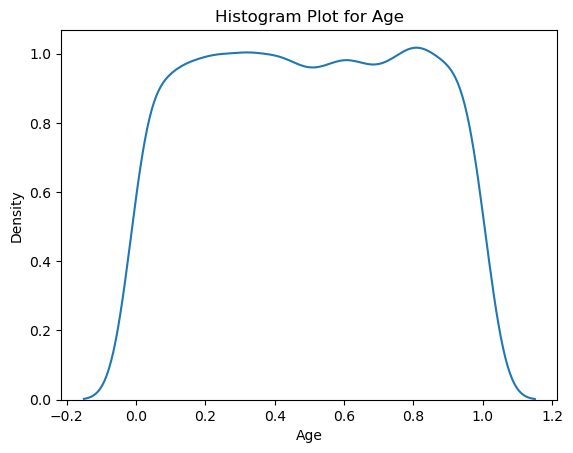

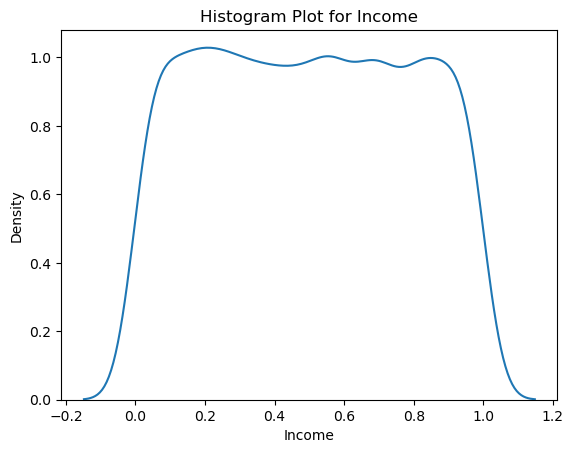

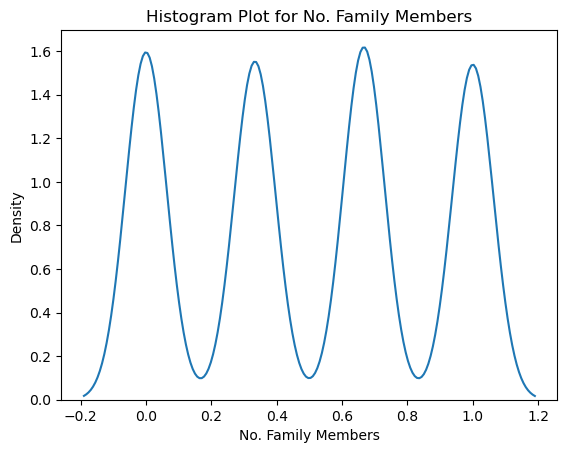

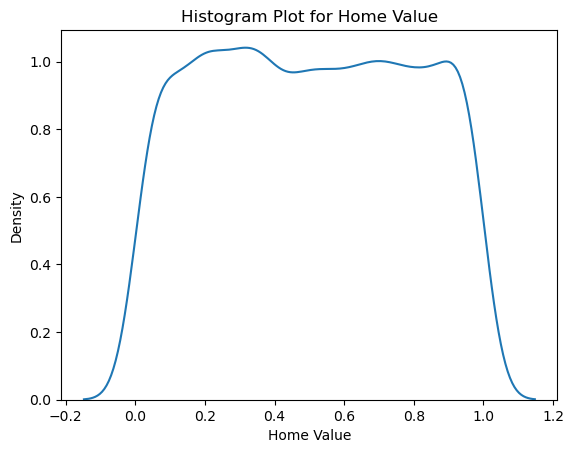

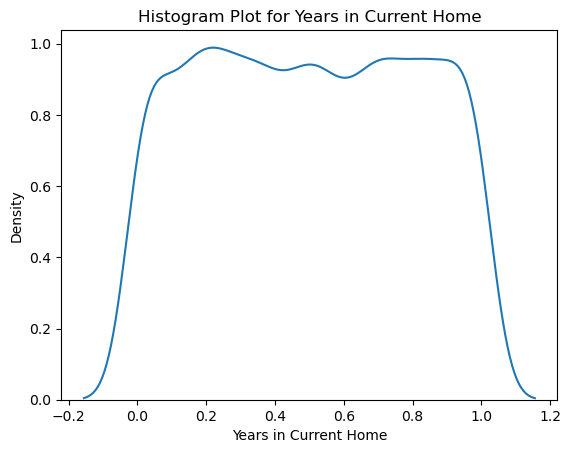

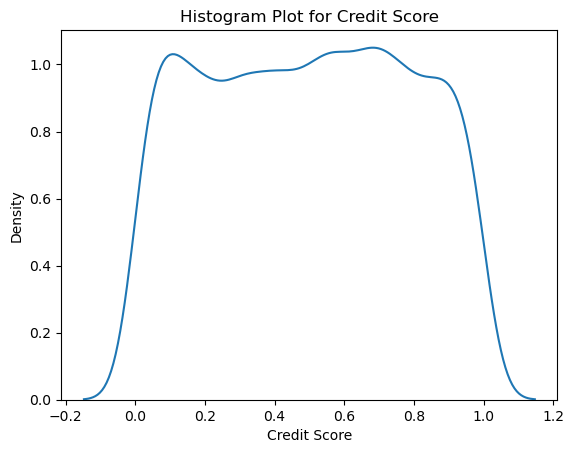

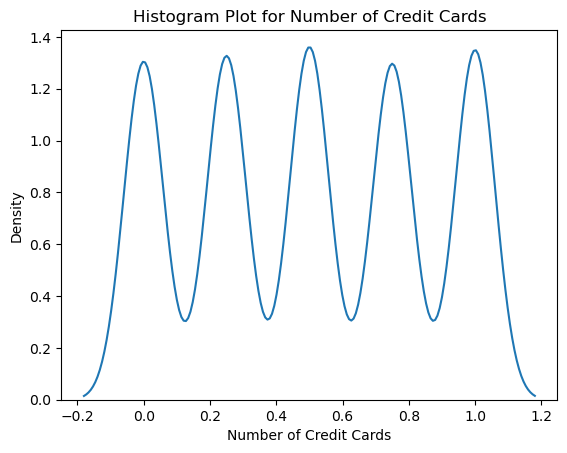

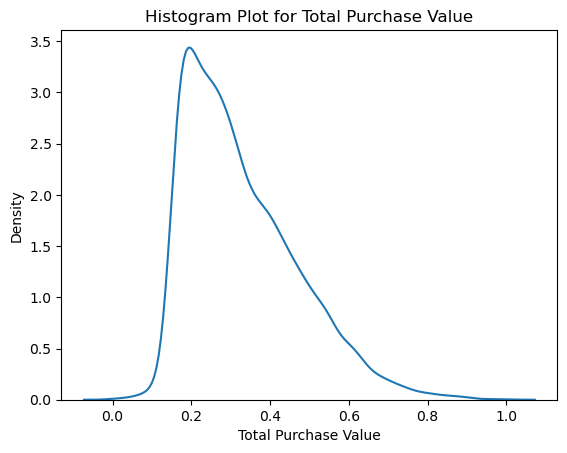

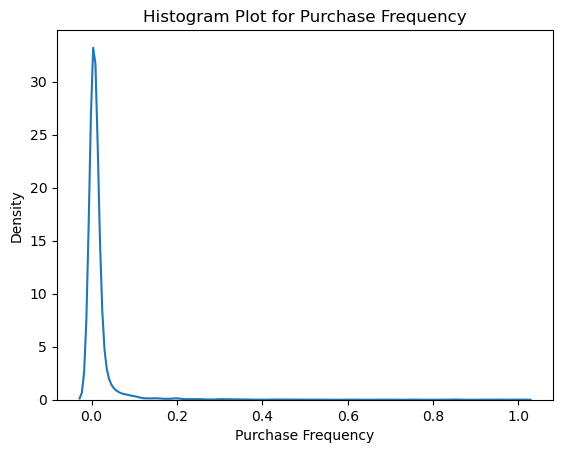

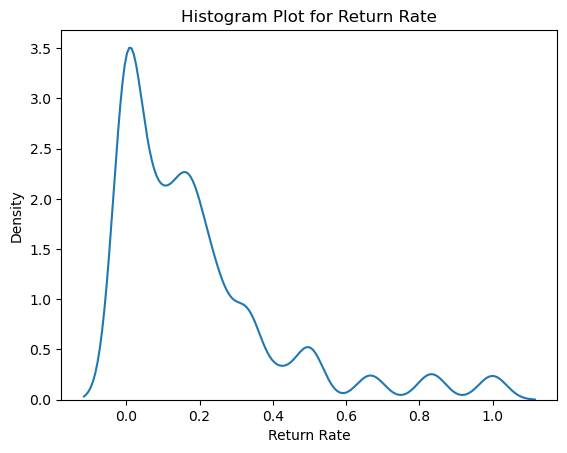

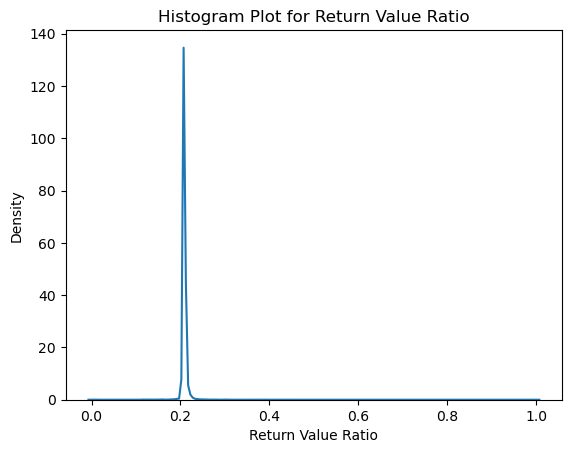

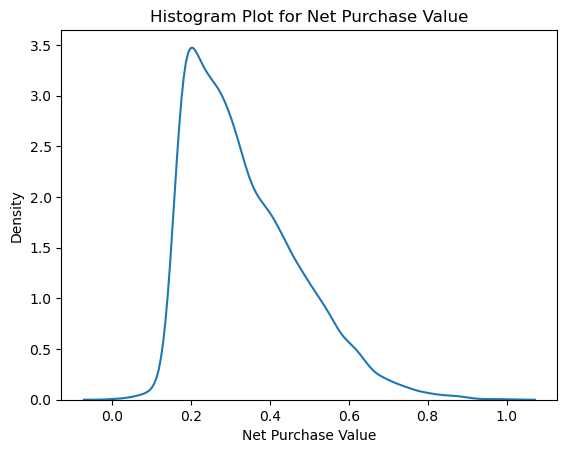

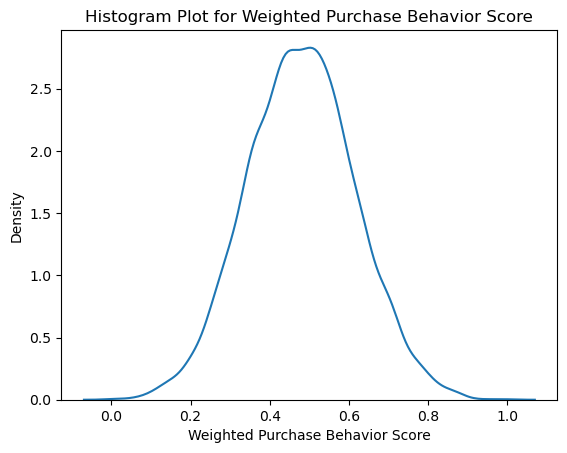

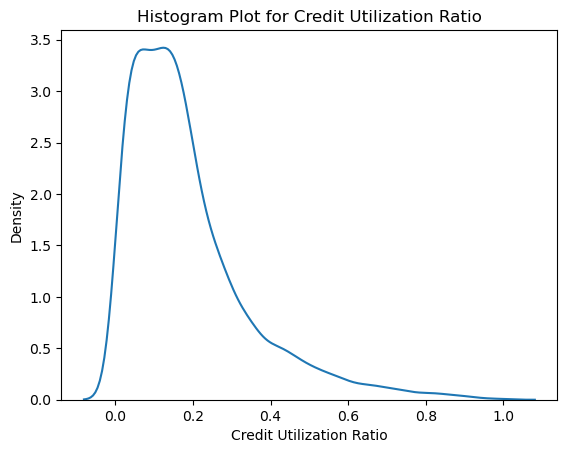

In [24]:
for cols in numerical_new:
    sns.kdeplot(df_scaled[cols])
    
    plt.title(f'Histogram Plot for {cols}')
    plt.show()

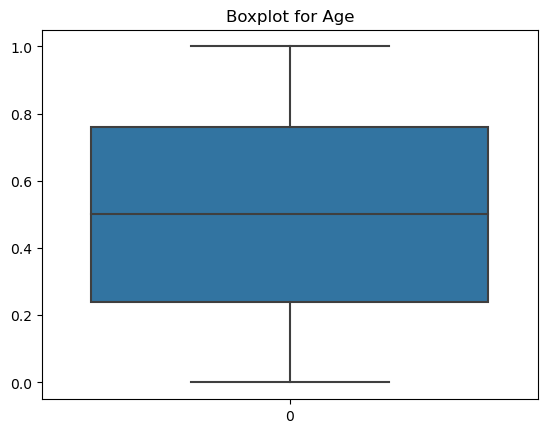

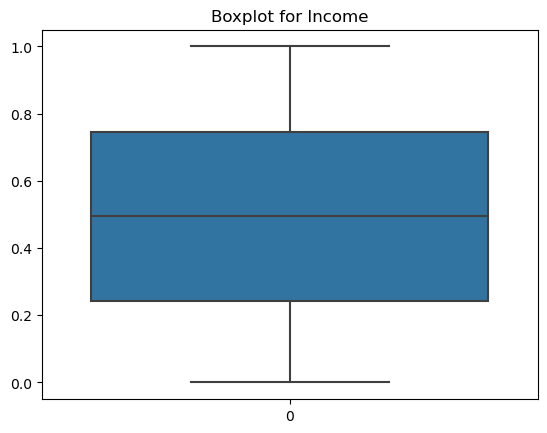

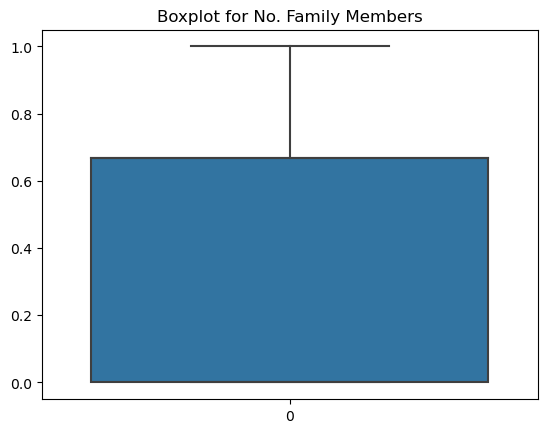

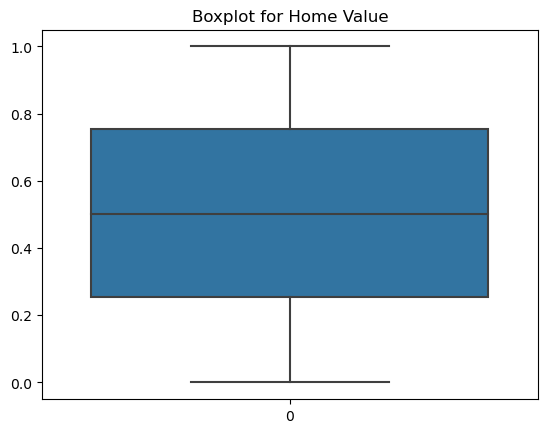

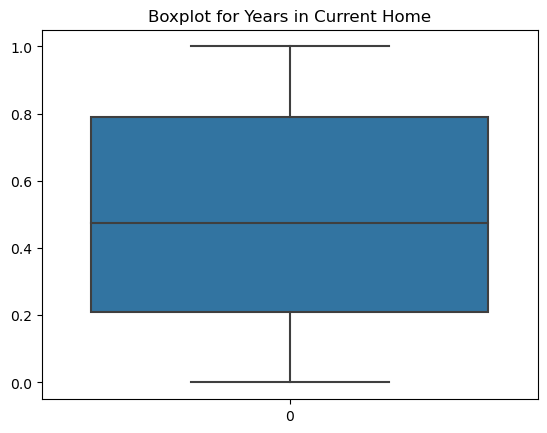

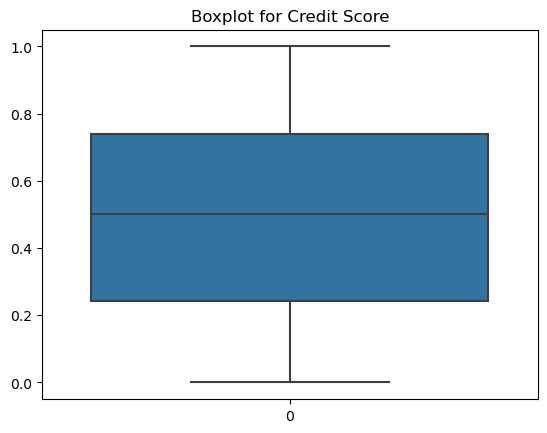

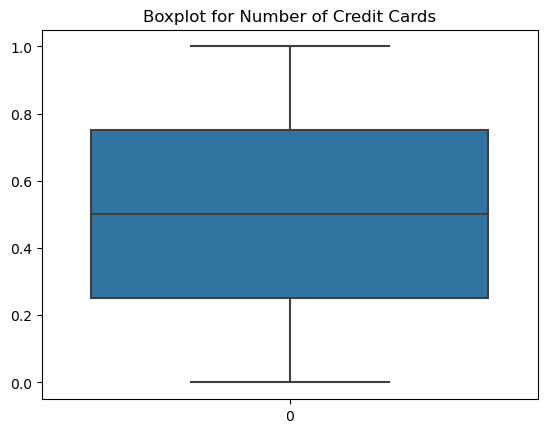

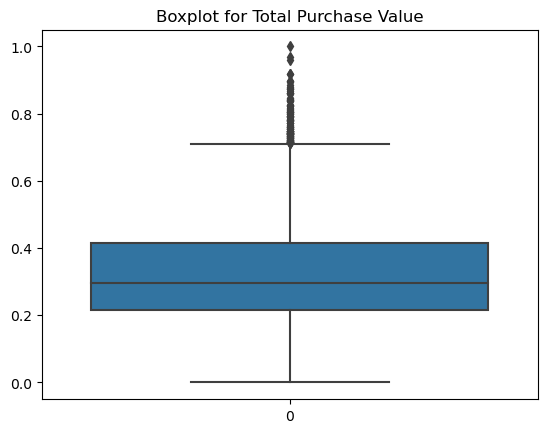

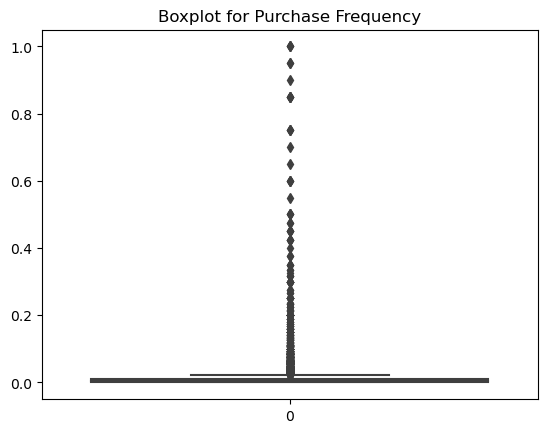

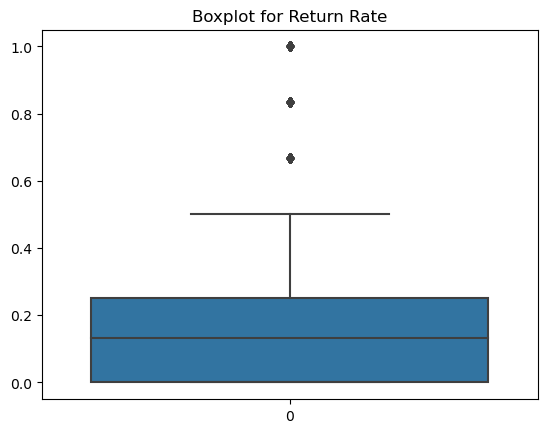

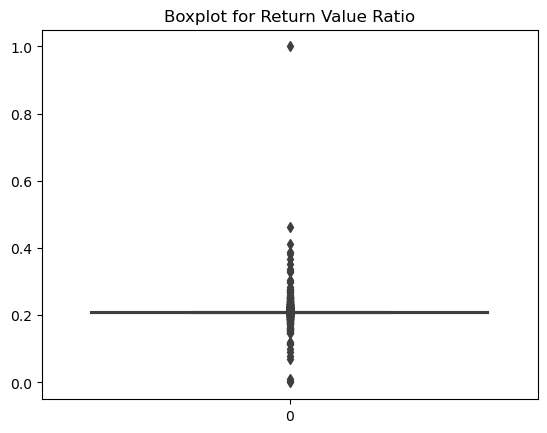

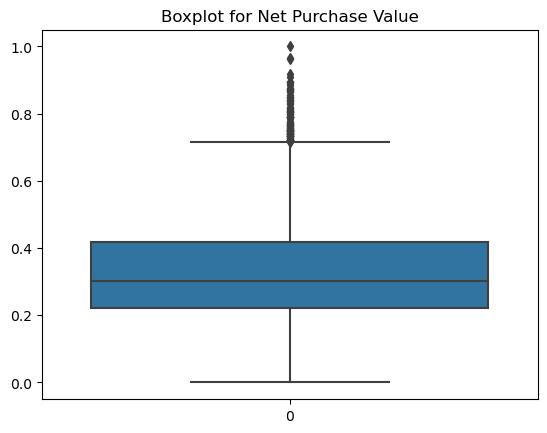

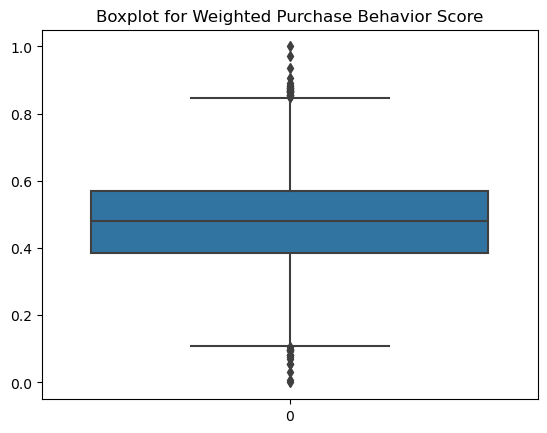

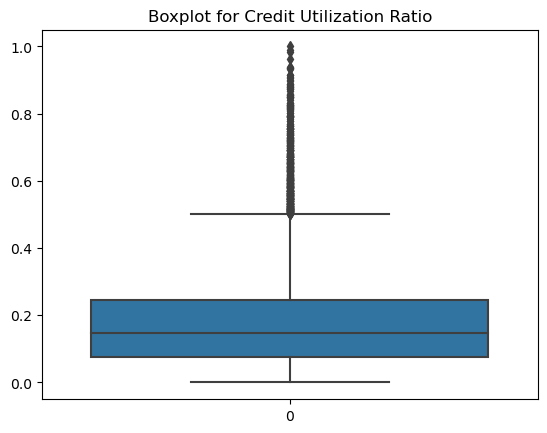

In [25]:
for cols in numerical_new:
    sns.boxplot(df_scaled[cols]).set_title(f'Boxplot for {cols}')
    plt.show()

In [26]:
df_scaled.head(10)

,Gender,Age,Income,Occupation,Marital Status,No. Family Members,Home Ownership,Home Value,Years in Current Home,Credit Score,Number of Credit Cards,Locations,Total Purchase Value,Purchase Frequency,Return Rate,Return Value Ratio,Net Purchase Value,Weighted Purchase Behavior Score,Credit Utilization Ratio
0,0.0,0.108696,0.181859,0.833333,0.666667,0.000000,0.0,0.413388,0.631579,0.881764,1.00,0.105263,0.350155,0.013793,0.333333,0.207420,0.360377,0.488038,0.378994
1,0.0,0.000000,0.389469,0.833333,0.666667,0.333333,0.0,0.138913,0.842105,0.865731,0.00,0.263158,0.567755,0.012121,0.208333,0.207366,0.573660,0.493735,0.241469
2,1.0,0.586957,0.983699,0.166667,0.666667,0.000000,0.0,0.972312,0.578947,0.104208,1.00,0.368421,0.216927,0.001145,0.208333,0.211124,0.216122,0.489584,0.126502
3,0.0,0.021739,0.177609,0.833333,0.333333,0.333333,0.0,0.046875,0.315789,0.114228,1.00,0.736842,0.167184,0.001000,0.033333,0.222701,0.173876,0.514844,0.480894
4,0.0,0.586957,0.689159,0.166667,0.666667,0.666667,0.0,0.935263,0.315789,0.717435,1.00,0.105263,0.558044,0.003801,0.277778,0.207633,0.556920,0.876655,0.063592
5,1.0,0.173913,0.700785,0.833333,0.000000,1.000000,1.0,0.647130,0.947368,0.601202,0.25,0.578947,0.530143,0.004242,0.055556,0.207866,0.524260,0.610341,0.158445
6,0.0,0.043478,0.442672,1.000000,1.000000,0.000000,0.0,0.702296,0.894737,0.256513,0.00,0.105263,0.303732,0.006593,0.055556,0.207978,0.309704,0.467345,0.128370
7,1.0,0.934783,0.381994,0.666667,0.666667,0.666667,1.0,0.430740,0.473684,0.659319,1.00,0.842105,0.686373,0.006597,0.166667,0.207660,0.678953,0.723645,0.138600
8,1.0,0.173913,0.980199,0.166667,0.333333,0.000000,0.0,0.537711,0.210526,0.160321,1.00,0.052632,0.200711,0.001471,0.083333,0.213209,0.198519,0.530112,0.110112
9,1.0,0.130435,0.574979,0.166667,0.666667,0.333333,1.0,0.040848,0.736842,0.889780,0.00,0.368421,0.213725,0.006667,0.100000,0.209508,0.219831,0.486228,0.030505


In [27]:
df_scaled.tail(20)

,Gender,Age,Income,Occupation,Marital Status,No. Family Members,Home Ownership,Home Value,Years in Current Home,Credit Score,Number of Credit Cards,Locations,Total Purchase Value,Purchase Frequency,Return Rate,Return Value Ratio,Net Purchase Value,Weighted Purchase Behavior Score,Credit Utilization Ratio
6980,1.0,0.913043,0.439897,0.166667,1.000000,1.000000,0.0,0.935697,0.315789,0.324649,0.25,0.947368,0.107173,0.004305,0.000000,0.206266,0.119826,0.211978,0.743148
6981,0.0,0.782609,0.988049,0.833333,0.666667,0.000000,0.0,0.979310,0.947368,0.488978,0.75,0.421053,0.166973,0.000813,0.250000,0.227389,0.171370,0.282943,0.104372
6982,1.0,0.369565,0.276514,0.166667,0.666667,0.000000,0.0,0.116059,0.000000,0.358717,0.25,0.842105,0.233240,0.003846,0.000000,0.208355,0.241875,0.425754,0.035605
6983,0.0,0.913043,0.170959,0.166667,0.333333,0.000000,0.0,0.749811,1.000000,0.466934,1.00,0.105263,0.672883,0.004749,0.100000,0.207139,0.684309,0.562961,0.089066
6984,1.0,0.760870,0.646607,0.000000,0.000000,1.000000,0.0,0.155459,0.421053,0.048096,0.50,0.684211,0.326065,0.008621,0.000000,0.208689,0.322493,0.539131,0.137108
6985,0.0,0.565217,0.949022,0.000000,0.333333,0.666667,0.0,0.071280,0.052632,0.400802,0.75,1.000000,0.429427,0.004857,0.833333,0.207724,0.431934,0.455837,0.074970
6986,1.0,0.543478,0.117956,0.000000,0.333333,0.333333,0.0,0.474662,0.526316,0.781563,0.25,0.368421,0.365437,0.024000,0.416667,0.207814,0.369714,0.500933,0.698483
6987,1.0,0.913043,0.560653,0.333333,0.666667,0.000000,1.0,0.585381,0.578947,0.691383,0.75,0.368421,0.596171,0.022500,0.111111,0.207446,0.599022,0.469193,0.141502
6988,0.0,0.913043,0.588254,0.333333,1.000000,0.000000,0.0,0.767900,0.947368,0.691383,0.25,0.052632,0.454092,0.009877,0.000000,0.207064,0.468687,0.438991,0.012248
6989,0.0,0.739130,0.963648,0.166667,0.333333,1.000000,0.0,0.728086,0.210526,0.252505,0.00,0.263158,0.172931,0.000676,0.166667,0.217135,0.178736,0.365173,0.061681


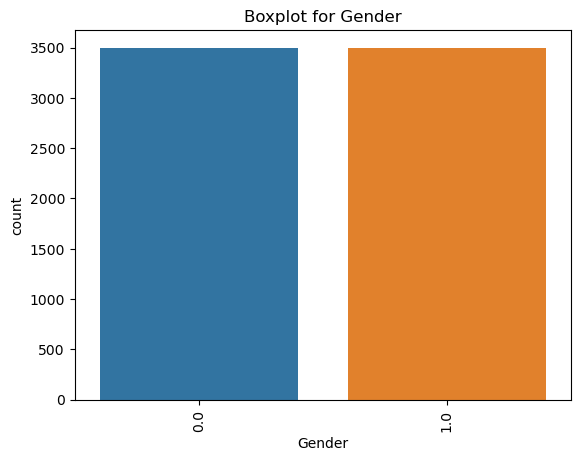

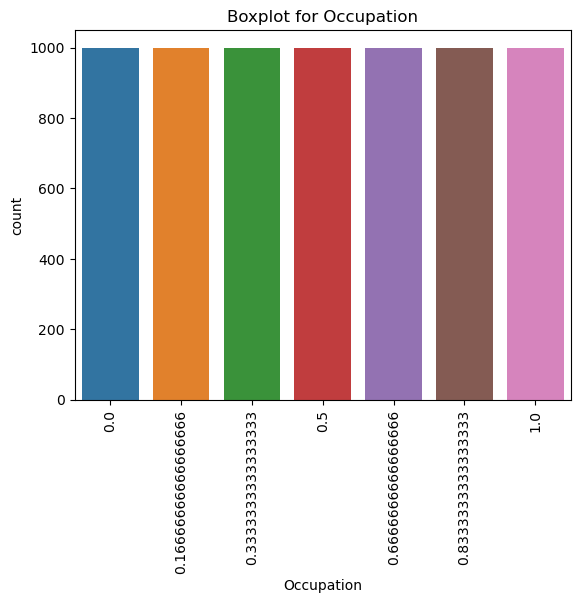

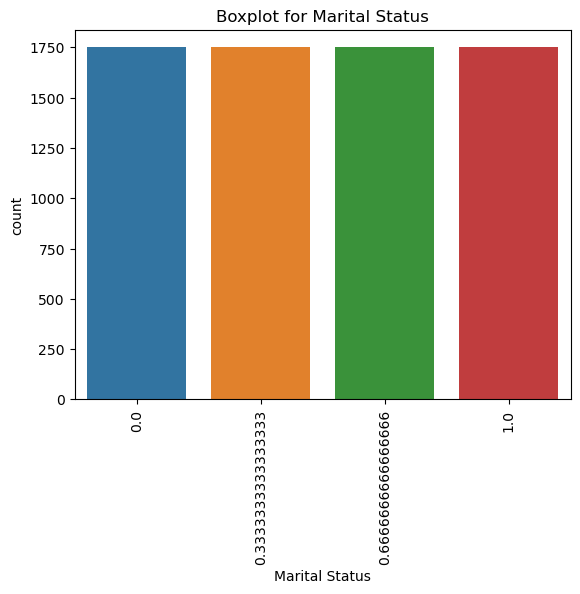

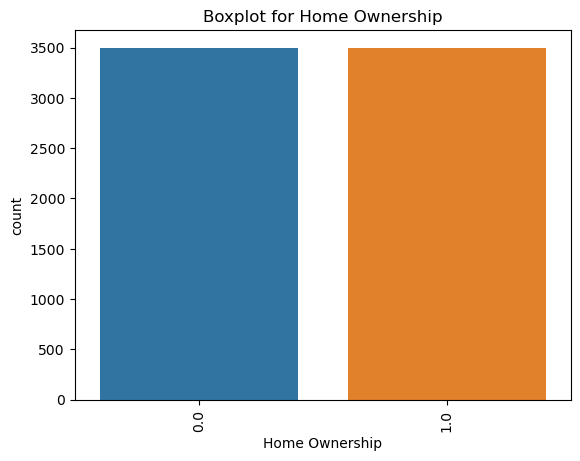

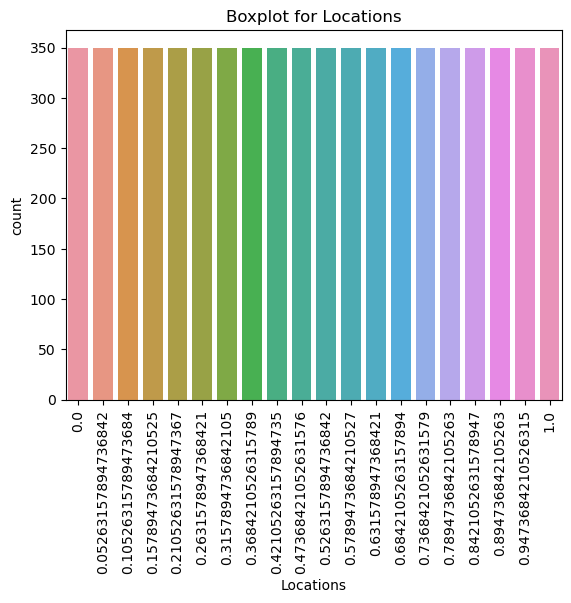

In [28]:
for cols in categorical_new:
    sns.countplot(data = df_scaled, x = cols).set_title(f'Boxplot for {cols}')
    plt.xticks(rotation=90)
    plt.show()

In [29]:
for cols in categorical_new :
    print(df_scaled[cols].value_counts())

Gender
0.0    3500
1.0    3500
Name: count, dtype: int64
Occupation
0.833333    1000
0.166667    1000
1.000000    1000
0.666667    1000
0.333333    1000
0.500000    1000
0.000000    1000
Name: count, dtype: int64
Marital Status
0.666667    1750
0.333333    1750
0.000000    1750
1.000000    1750
Name: count, dtype: int64
Home Ownership
0.0    3500
1.0    3500
Name: count, dtype: int64
Locations
0.105263    350
0.263158    350
0.684211    350
1.000000    350
0.526316    350
0.421053    350
0.947368    350
0.473684    350
0.000000    350
0.789474    350
0.315789    350
0.631579    350
0.894737    350
0.157895    350
0.052632    350
0.842105    350
0.578947    350
0.736842    350
0.368421    350
0.210526    350
Name: count, dtype: int64


In [30]:
df_scaled.describe()

,Gender,Age,Income,Occupation,Marital Status,No. Family Members,Home Ownership,Home Value,Years in Current Home,Credit Score,Number of Credit Cards,Locations,Total Purchase Value,Purchase Frequency,Return Rate,Return Value Ratio,Net Purchase Value,Weighted Purchase Behavior Score,Credit Utilization Ratio
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.00000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.500000,0.498379,0.495985,0.500000,0.500000,0.497238,0.500000,0.502579,0.499436,0.495360,0.502214,0.50000,0.328802,0.016366,0.190196,0.208860,0.334304,0.479483,0.187498
std,0.500036,0.293458,0.290159,0.333357,0.372705,0.371799,0.500036,0.289283,0.305009,0.288626,0.353092,0.30351,0.142120,0.054993,0.226345,0.013608,0.140817,0.136065,0.159045
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.239130,0.243143,0.166667,0.250000,0.000000,0.000000,0.253027,0.210526,0.242485,0.250000,0.25000,0.215835,0.002667,0.000000,0.207454,0.222110,0.385299,0.074846
50%,0.500000,0.500000,0.494100,0.500000,0.500000,0.666667,0.500000,0.500219,0.473684,0.501002,0.500000,0.50000,0.296698,0.005556,0.133333,0.207840,0.302068,0.479354,0.148348
75%,1.000000,0.760870,0.746719,0.833333,0.750000,0.666667,1.000000,0.753516,0.789474,0.739479,0.750000,0.75000,0.414886,0.010916,0.250000,0.208748,0.419538,0.570154,0.245225
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualising the correlation between input features

In [31]:
df_scaled.corr()

,Gender,Age,Income,Occupation,Marital Status,No. Family Members,Home Ownership,Home Value,Years in Current Home,Credit Score,Number of Credit Cards,Locations,Total Purchase Value,Purchase Frequency,Return Rate,Return Value Ratio,Net Purchase Value,Weighted Purchase Behavior Score,Credit Utilization Ratio
Gender,1.000000,0.023495,0.008175,0.017714,-0.002044,-0.022543,0.003429,0.030692,0.005202,-0.003486,-0.006272,-0.020563,0.021588,-0.001492,0.003545,0.005434,0.021624,0.007519,0.006623
Age,0.023495,1.000000,-0.009948,0.011981,-0.006077,-0.006797,-0.003598,0.002058,0.021344,-0.003985,0.017601,-0.000701,-0.007555,0.006760,0.003096,0.000607,-0.007938,-0.018737,-0.001768
Income,0.008175,-0.009948,1.000000,0.007391,-0.014502,0.000123,0.007340,-0.018464,0.006419,0.014244,-0.004948,-0.014429,-0.007628,0.005528,0.003228,0.018255,-0.008225,-0.015736,0.000059
Occupation,0.017714,0.011981,0.007391,1.000000,0.010669,0.011848,-0.015714,0.002100,-0.012474,-0.000666,0.001517,0.004311,-0.011904,0.017175,0.005688,-0.016799,-0.010745,-0.011345,0.004812
Marital Status,-0.002044,-0.006077,-0.014502,0.010669,1.000000,-0.013977,0.015333,-0.008257,0.006648,0.017534,-0.016919,-0.006493,0.008499,0.020711,0.005766,-0.017036,0.009120,-0.012916,-0.002395
No. Family Members,-0.022543,-0.006797,0.000123,0.011848,-0.013977,1.000000,-0.011015,0.005093,-0.006811,0.002889,0.004128,0.004443,0.011915,0.007813,0.015230,-0.012503,0.012366,0.014161,0.004009
Home Ownership,0.003429,-0.003598,0.007340,-0.015714,0.015333,-0.011015,1.000000,-0.022280,-0.001750,-0.007499,-0.017196,0.015558,-0.019012,-0.014410,0.008083,-0.019707,-0.019111,-0.019081,-0.002478
Home Value,0.030692,0.002058,-0.018464,0.002100,-0.008257,0.005093,-0.022280,1.000000,-0.009355,-0.011006,-0.013214,-0.011135,0.023974,0.002213,-0.020227,-0.017079,0.024665,0.015947,0.007942
Years in Current Home,0.005202,0.021344,0.006419,-0.012474,0.006648,-0.006811,-0.001750,-0.009355,1.000000,-0.015643,0.002822,0.002764,-0.011870,0.015962,-0.013452,-0.030736,-0.011762,-0.022067,-0.011173
Credit Score,-0.003486,-0.003985,0.014244,-0.000666,0.017534,0.002889,-0.007499,-0.011006,-0.015643,1.000000,-0.006427,0.014456,0.008613,0.006649,0.005722,-0.014336,0.008857,-0.006131,-0.004049


<Axes: >

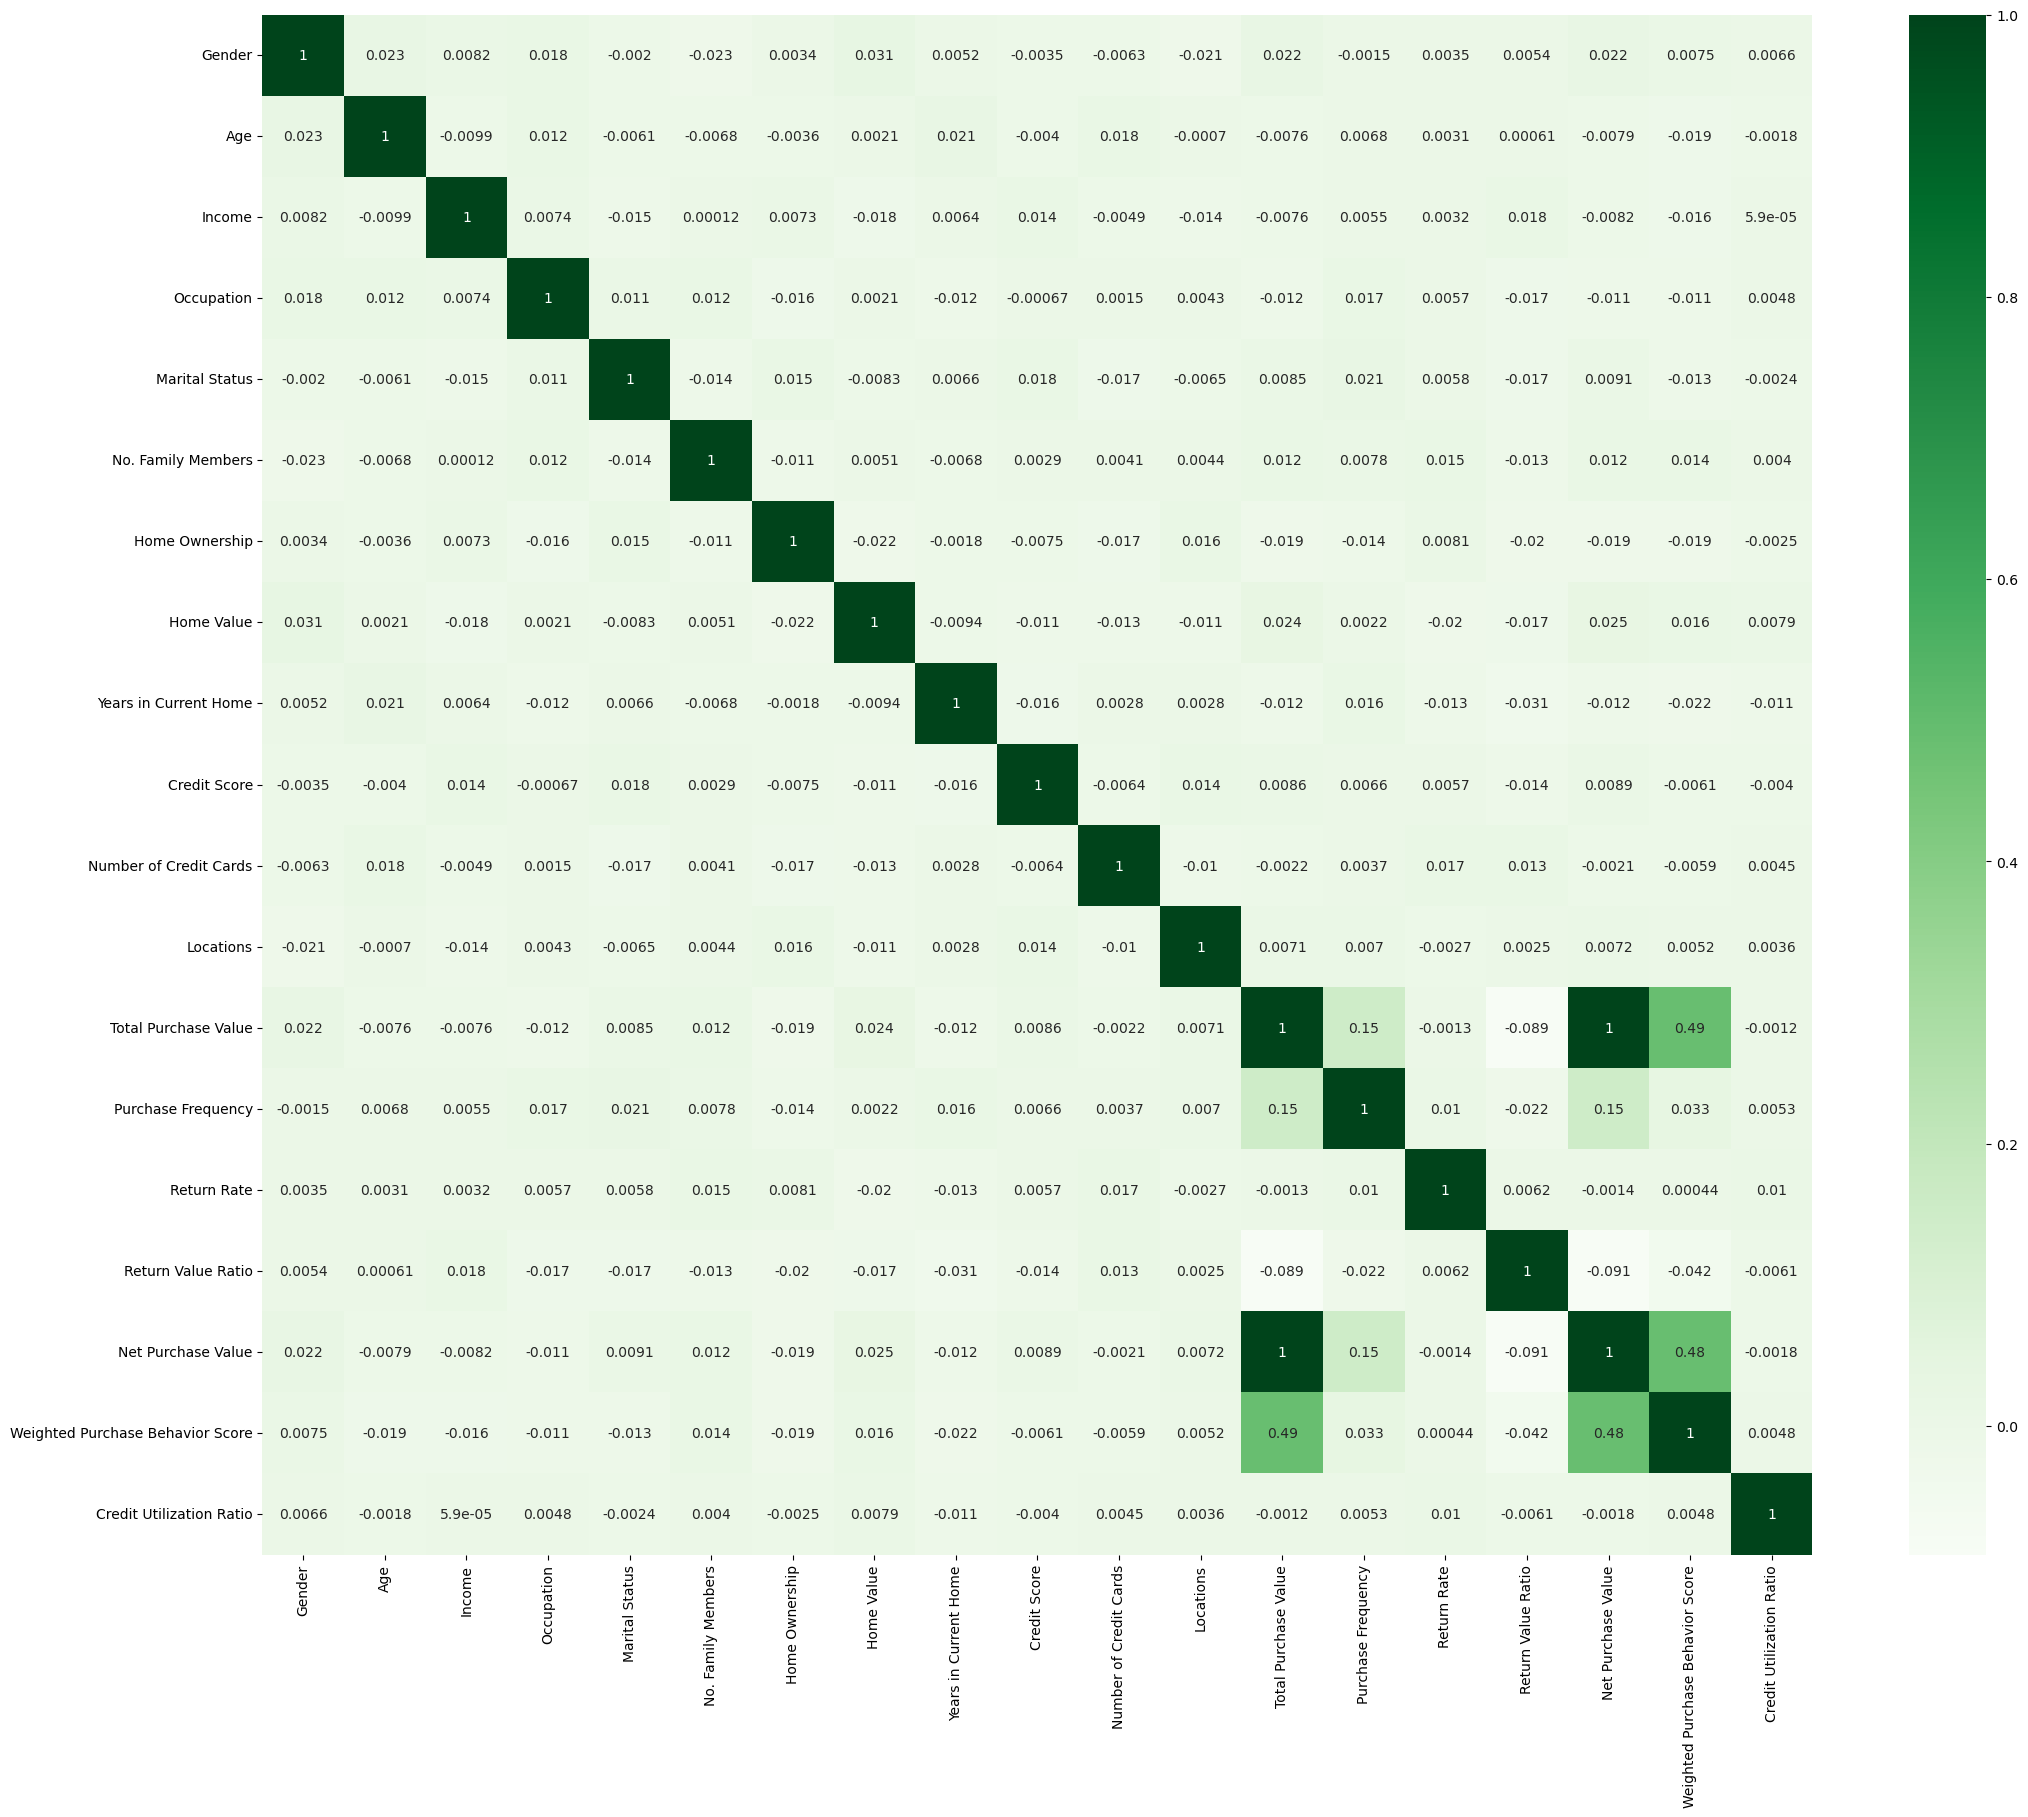

In [32]:
plt.subplots(figsize=(25,20))
sns.heatmap(df_scaled.corr(), annot = True, cmap = "Greens")

In [33]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_scaled, test_size = 0.30, shuffle = False, stratify = None)

## The dataset does not contain a target variable that tells us which customers have already accepted a loan and hence we cannot use Supervised Classification techniques to identify potential customers likely to accept loans. Hence we approach the problem using Clustering techniques to group individuals with similar characteristics into "clusters".

## Our data has both categorical and quantitative features. Unfortunately, K-means clustering does not work very well with categorical features, since applying Euclidean metric is not the best way to approach Clustering when working a mixed dataset.

## Here we use Gower's distance metric.

## Gower’s distance is a metric used to measure the similarity between two data points that contain both numeric and categorical variables. It simply works by applying different measures of similarity for the each data type. The similarity scores for each data type are then combined to create an overall similarity score. The measures used for each data type are as follows:

### Numerical Variables: a normalized Manhattan distance
### Categorical Variables: the variables are first one hot encoded and and then the Jaccard distance is applied.
### Ordinal Variables: the variables are first sorted, then the Manhattan distance is applied with an adjustment for ties.

In [34]:
!pip install gower

In [35]:
import gower

dist_matrix = gower.gower_matrix(df_train)

In [36]:
!pip install scikit-learn-extra

In [37]:
from sklearn_extra.cluster import KMedoids

clusters = (KMedoids(n_clusters= 2, metric= 'precomputed', method='pam', init='build', max_iter=300, random_state= 42).fit(dist_matrix).labels_)

clusters_df = pd.DataFrame(clusters)

clusters_df = clusters_df.rename(columns={0: 'Target'})


In [38]:
clusters_df

,Target
0,0
1,0
2,0
3,0
4,0
...,...
4895,0
4896,0
4897,1
4898,0


In [39]:
df_train

,Gender,Age,Income,Occupation,Marital Status,No. Family Members,Home Ownership,Home Value,Years in Current Home,Credit Score,Number of Credit Cards,Locations,Total Purchase Value,Purchase Frequency,Return Rate,Return Value Ratio,Net Purchase Value,Weighted Purchase Behavior Score,Credit Utilization Ratio
0,0.0,0.108696,0.181859,0.833333,0.666667,0.000000,0.0,0.413388,0.631579,0.881764,1.00,0.105263,0.350155,0.013793,0.333333,0.207420,0.360377,0.488038,0.378994
1,0.0,0.000000,0.389469,0.833333,0.666667,0.333333,0.0,0.138913,0.842105,0.865731,0.00,0.263158,0.567755,0.012121,0.208333,0.207366,0.573660,0.493735,0.241469
2,1.0,0.586957,0.983699,0.166667,0.666667,0.000000,0.0,0.972312,0.578947,0.104208,1.00,0.368421,0.216927,0.001145,0.208333,0.211124,0.216122,0.489584,0.126502
3,0.0,0.021739,0.177609,0.833333,0.333333,0.333333,0.0,0.046875,0.315789,0.114228,1.00,0.736842,0.167184,0.001000,0.033333,0.222701,0.173876,0.514844,0.480894
4,0.0,0.586957,0.689159,0.166667,0.666667,0.666667,0.0,0.935263,0.315789,0.717435,1.00,0.105263,0.558044,0.003801,0.277778,0.207633,0.556920,0.876655,0.063592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4895,1.0,0.608696,0.457748,0.833333,0.000000,0.000000,0.0,0.385366,0.684211,0.454910,0.50,0.315789,0.387152,0.002593,0.222222,0.207688,0.392222,0.721502,0.108205
4896,0.0,0.500000,0.273439,0.000000,0.000000,0.666667,0.0,0.773406,0.526316,0.719439,0.25,0.000000,0.233356,0.010000,0.166667,0.208939,0.239020,0.519043,0.098436
4897,1.0,0.456522,0.414521,0.500000,0.333333,1.000000,1.0,0.186594,1.000000,0.919840,0.00,0.789474,0.460407,0.216667,0.000000,0.207587,0.464255,0.678975,0.186955
4898,1.0,0.934783,0.883844,0.833333,0.000000,0.666667,0.0,0.956395,0.473684,0.945892,0.75,0.473684,0.136145,0.003614,0.083333,0.205045,0.148391,0.295421,0.071186


In [40]:
df_merged = pd.concat([df_train, clusters_df], axis = 1)

df_merged.shape

(4900, 20)

In [42]:
columns_of_interest = ["Income", "Credit Utilization Ratio", "Credit Score", "No. Family Members", "Home Value", "Years in Current Home", "Target"]

df_interest = df_merged[columns_of_interest]

df_interest

,Income,Credit Utilization Ratio,Credit Score,No. Family Members,Home Value,Years in Current Home,Target
0,0.181859,0.378994,0.881764,0.000000,0.413388,0.631579,0
1,0.389469,0.241469,0.865731,0.333333,0.138913,0.842105,0
2,0.983699,0.126502,0.104208,0.000000,0.972312,0.578947,0
3,0.177609,0.480894,0.114228,0.333333,0.046875,0.315789,0
4,0.689159,0.063592,0.717435,0.666667,0.935263,0.315789,0
...,...,...,...,...,...,...,...
4895,0.457748,0.108205,0.454910,0.000000,0.385366,0.684211,0
4896,0.273439,0.098436,0.719439,0.666667,0.773406,0.526316,0
4897,0.414521,0.186955,0.919840,1.000000,0.186594,1.000000,1
4898,0.883844,0.071186,0.945892,0.666667,0.956395,0.473684,0


<Axes: >

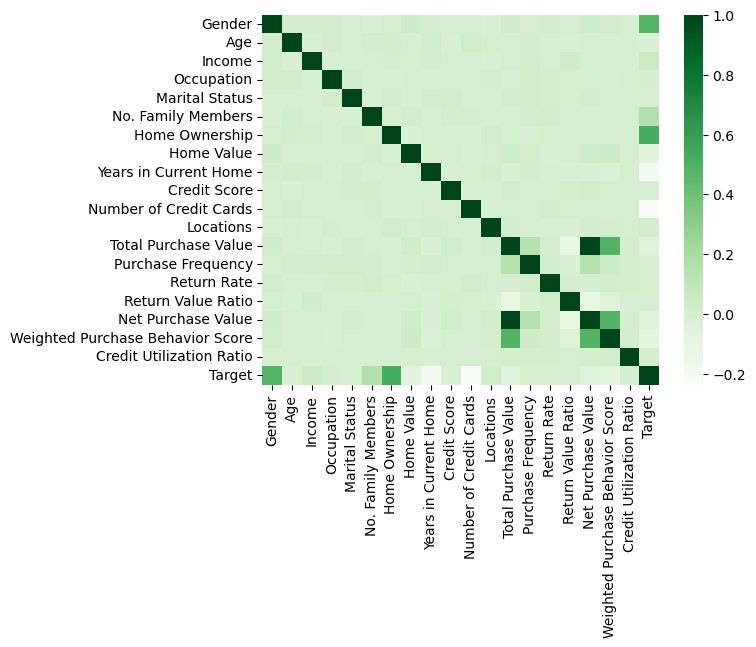

In [43]:
sns.heatmap(df_merged.corr(), cmap = "Greens")

In [44]:
df_merged.corr()

,Gender,Age,Income,Occupation,Marital Status,No. Family Members,Home Ownership,Home Value,Years in Current Home,Credit Score,Number of Credit Cards,Locations,Total Purchase Value,Purchase Frequency,Return Rate,Return Value Ratio,Net Purchase Value,Weighted Purchase Behavior Score,Credit Utilization Ratio,Target
Gender,1.000000,0.019136,0.018634,0.022609,-0.005043,-0.018440,0.003240,0.031179,0.009236,-0.009092,-0.001806,-0.015103,0.027502,0.004669,0.020179,-0.006111,0.027678,0.019381,0.004571,0.482465
Age,0.019136,1.000000,-0.018326,0.018769,-0.006209,0.013518,0.012841,-0.001032,0.015906,-0.015269,0.019516,0.003896,-0.006297,0.011850,-0.006437,-0.016625,-0.007125,-0.012757,0.003039,-0.018635
Income,0.018634,-0.018326,1.000000,-0.007142,-0.005928,-0.000025,0.006740,0.001916,0.011530,-0.001406,-0.005676,-0.023036,-0.004462,0.017537,-0.003252,0.026184,-0.004511,-0.013681,-0.011427,0.065257
Occupation,0.022609,0.018769,-0.007142,1.000000,0.017139,-0.009700,-0.014721,-0.002721,-0.009765,-0.006480,-0.007995,0.005336,-0.014834,0.024123,0.009475,-0.002905,-0.013865,-0.016098,0.001542,0.006459
Marital Status,-0.005043,-0.006209,-0.005928,0.017139,1.000000,-0.010881,0.015149,-0.010475,0.013255,0.018546,-0.006931,-0.004658,0.019349,0.015611,0.008213,0.003124,0.020165,-0.001522,-0.000904,-0.003946
No. Family Members,-0.018440,0.013518,-0.000025,-0.009700,-0.010881,1.000000,0.000761,0.012922,-0.013307,0.012089,0.007958,-0.000946,-0.000622,0.010456,0.020357,-0.008361,0.000090,0.000106,0.003975,0.156486
Home Ownership,0.003240,0.012841,0.006740,-0.014721,0.015149,0.000761,1.000000,-0.031759,-0.005272,-0.010185,-0.019968,0.015934,-0.010852,-0.019332,0.002809,-0.010783,-0.010742,-0.010543,-0.009193,0.523640
Home Value,0.031179,-0.001032,0.001916,-0.002721,-0.010475,0.012922,-0.031759,1.000000,-0.009933,-0.003186,-0.016308,-0.006266,0.026904,0.006858,-0.024484,-0.005188,0.027624,0.029420,0.002791,-0.066168
Years in Current Home,0.009236,0.015906,0.011530,-0.009765,0.013255,-0.013307,-0.005272,-0.009933,1.000000,-0.011988,0.000353,0.010023,-0.024622,0.013245,-0.012125,-0.025349,-0.024503,-0.036043,-0.009277,-0.199797
Credit Score,-0.009092,-0.015269,-0.001406,-0.006480,0.018546,0.012089,-0.010185,-0.003186,-0.011988,1.000000,-0.013863,-0.000606,0.016840,-0.003350,0.002178,0.009569,0.017015,-0.005891,-0.012575,-0.010095


In [45]:
df_merged = df_merged.drop(columns = ["Net Purchase Value"])

<Axes: xlabel='Gender', ylabel='count'>

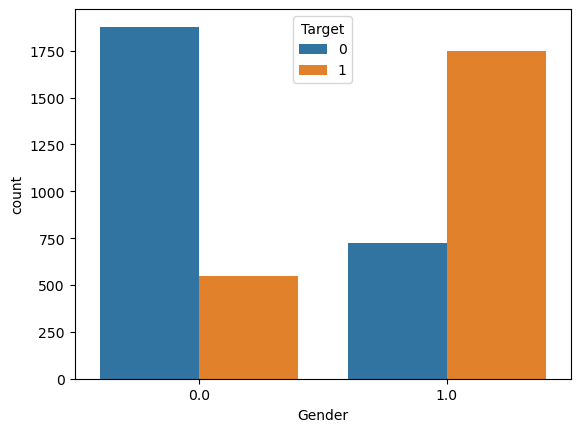

In [46]:
sns.countplot(data = df_merged, x = "Gender", hue = "Target")

<Axes: xlabel='Home Ownership', ylabel='count'>

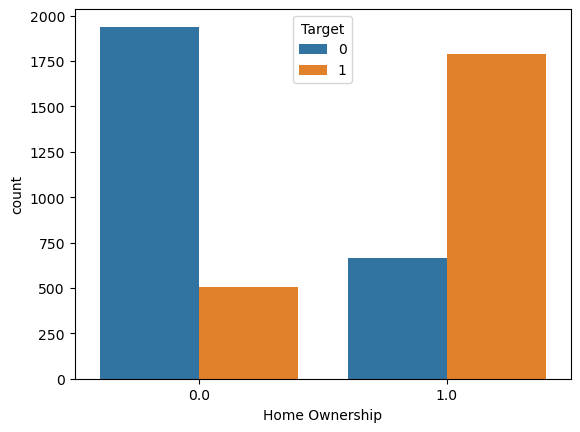

In [47]:
sns.countplot(data = df_merged, x = "Home Ownership", hue = "Target")

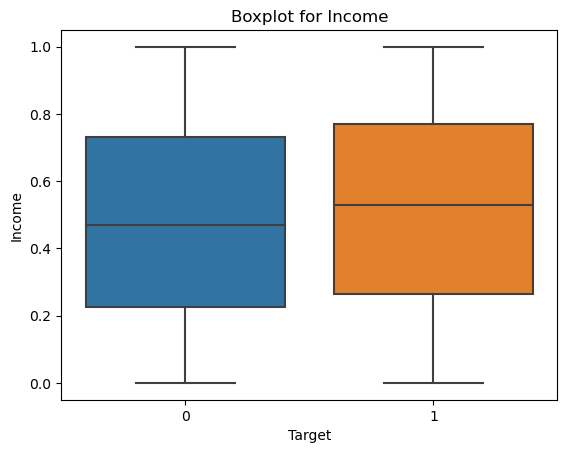

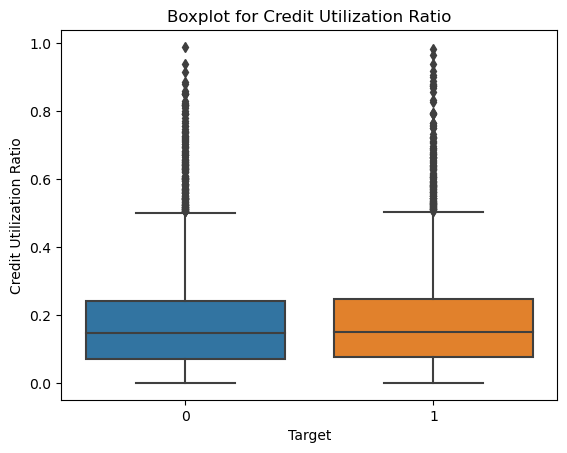

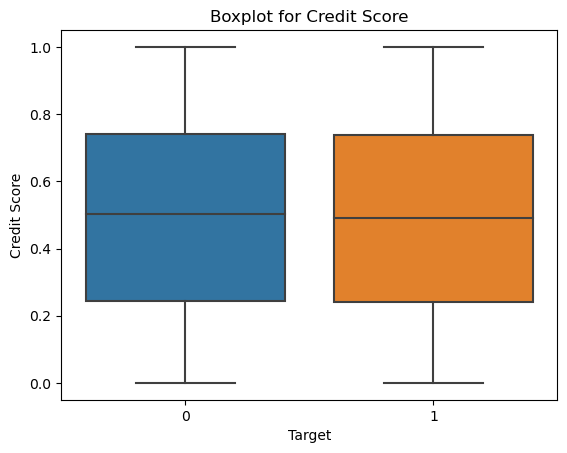

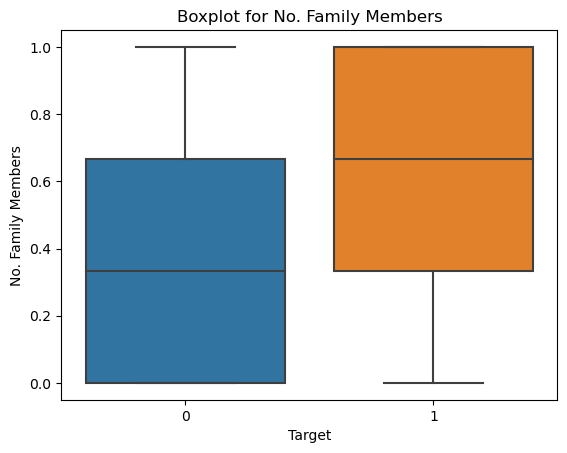

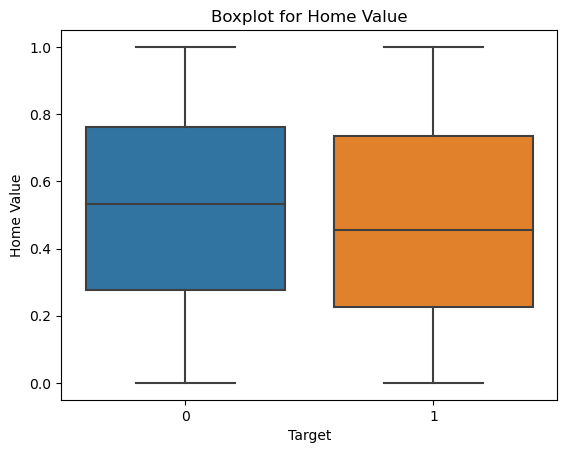

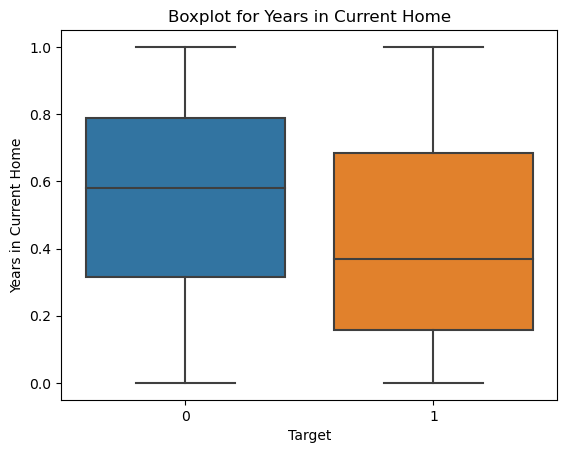

In [48]:
for column in df_interest.columns :
    sns.boxplot(data = df_interest, x = "Target", y = df_interest[column])
    plt.title(f"Boxplot for {column}")
    plt.show()
    if column == "Years in Current Home":
        break

<Axes: >

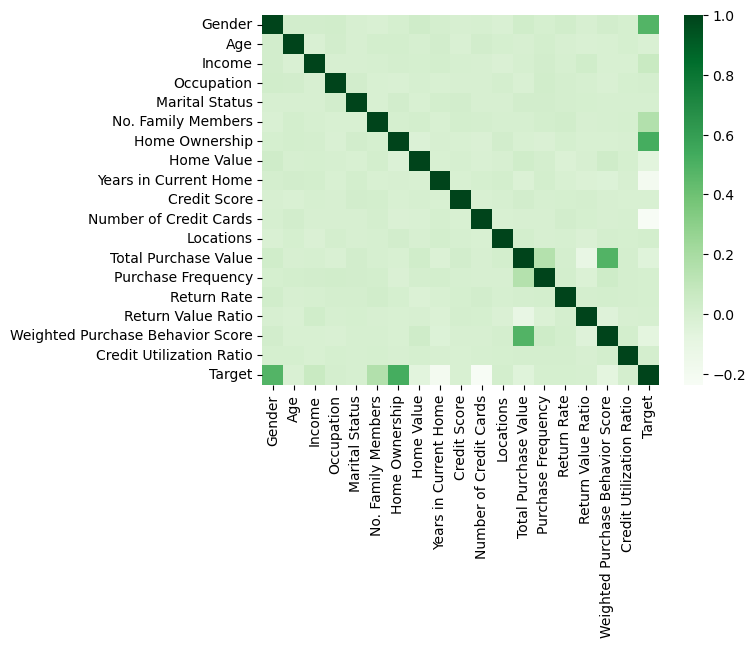

In [49]:
sns.heatmap(df_merged.corr(), cmap = "Greens")

In [50]:
df_merged.corr()

,Gender,Age,Income,Occupation,Marital Status,No. Family Members,Home Ownership,Home Value,Years in Current Home,Credit Score,Number of Credit Cards,Locations,Total Purchase Value,Purchase Frequency,Return Rate,Return Value Ratio,Weighted Purchase Behavior Score,Credit Utilization Ratio,Target
Gender,1.000000,0.019136,0.018634,0.022609,-0.005043,-0.018440,0.003240,0.031179,0.009236,-0.009092,-0.001806,-0.015103,0.027502,0.004669,0.020179,-0.006111,0.019381,0.004571,0.482465
Age,0.019136,1.000000,-0.018326,0.018769,-0.006209,0.013518,0.012841,-0.001032,0.015906,-0.015269,0.019516,0.003896,-0.006297,0.011850,-0.006437,-0.016625,-0.012757,0.003039,-0.018635
Income,0.018634,-0.018326,1.000000,-0.007142,-0.005928,-0.000025,0.006740,0.001916,0.011530,-0.001406,-0.005676,-0.023036,-0.004462,0.017537,-0.003252,0.026184,-0.013681,-0.011427,0.065257
Occupation,0.022609,0.018769,-0.007142,1.000000,0.017139,-0.009700,-0.014721,-0.002721,-0.009765,-0.006480,-0.007995,0.005336,-0.014834,0.024123,0.009475,-0.002905,-0.016098,0.001542,0.006459
Marital Status,-0.005043,-0.006209,-0.005928,0.017139,1.000000,-0.010881,0.015149,-0.010475,0.013255,0.018546,-0.006931,-0.004658,0.019349,0.015611,0.008213,0.003124,-0.001522,-0.000904,-0.003946
No. Family Members,-0.018440,0.013518,-0.000025,-0.009700,-0.010881,1.000000,0.000761,0.012922,-0.013307,0.012089,0.007958,-0.000946,-0.000622,0.010456,0.020357,-0.008361,0.000106,0.003975,0.156486
Home Ownership,0.003240,0.012841,0.006740,-0.014721,0.015149,0.000761,1.000000,-0.031759,-0.005272,-0.010185,-0.019968,0.015934,-0.010852,-0.019332,0.002809,-0.010783,-0.010543,-0.009193,0.523640
Home Value,0.031179,-0.001032,0.001916,-0.002721,-0.010475,0.012922,-0.031759,1.000000,-0.009933,-0.003186,-0.016308,-0.006266,0.026904,0.006858,-0.024484,-0.005188,0.029420,0.002791,-0.066168
Years in Current Home,0.009236,0.015906,0.011530,-0.009765,0.013255,-0.013307,-0.005272,-0.009933,1.000000,-0.011988,0.000353,0.010023,-0.024622,0.013245,-0.012125,-0.025349,-0.036043,-0.009277,-0.199797
Credit Score,-0.009092,-0.015269,-0.001406,-0.006480,0.018546,0.012089,-0.010185,-0.003186,-0.011988,1.000000,-0.013863,-0.000606,0.016840,-0.003350,0.002178,0.009569,-0.005891,-0.012575,-0.010095


In [51]:
dist_matrix_test = gower.gower_matrix(df_test)

In [52]:
clusters_test = (KMedoids(n_clusters= 2, metric= 'precomputed', method='pam', init='build', max_iter=300, random_state= 42).fit(dist_matrix_test).labels_)

clusters_df_test = pd.DataFrame(clusters_test)

clusters_df_test = clusters_df_test.rename(columns={0: 'Target'})

clusters_df_test

,Target
0,1
1,1
2,0
3,1
4,1
...,...
2095,1
2096,1
2097,1
2098,1


In [53]:
df_test.reset_index(drop=True, inplace=True)

In [54]:
df_test

,Gender,Age,Income,Occupation,Marital Status,No. Family Members,Home Ownership,Home Value,Years in Current Home,Credit Score,Number of Credit Cards,Locations,Total Purchase Value,Purchase Frequency,Return Rate,Return Value Ratio,Net Purchase Value,Weighted Purchase Behavior Score,Credit Utilization Ratio
0,1.0,0.543478,0.252988,0.166667,1.000000,0.333333,1.0,0.974177,0.789474,0.589178,0.50,0.631579,0.290108,0.016667,0.500000,0.208415,0.293059,0.671795,0.099775
1,1.0,0.739130,0.978524,0.666667,0.000000,1.000000,0.0,0.595606,0.368421,0.070140,0.75,0.210526,0.619323,0.008621,0.083333,0.207412,0.622575,0.479529,0.596703
2,0.0,0.760870,0.803815,0.000000,0.333333,0.666667,1.0,0.651826,0.736842,0.799599,1.00,0.526316,0.325138,0.030000,0.166667,0.208550,0.323242,0.528151,0.161484
3,1.0,0.195652,0.110356,1.000000,0.666667,0.333333,1.0,0.408750,0.105263,0.877756,0.00,0.578947,0.670808,0.016327,0.833333,0.207216,0.679552,0.712856,0.239834
4,1.0,0.673913,0.729361,0.500000,1.000000,1.000000,0.0,0.452325,0.157895,0.601202,0.00,1.000000,0.739507,0.011250,0.041667,0.207576,0.733148,0.519603,0.051255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,1.0,0.956522,0.803990,0.500000,0.666667,1.000000,0.0,0.420449,0.157895,0.046092,0.00,0.105263,0.412821,0.035714,0.000000,0.207706,0.416415,0.520148,0.243261
2096,1.0,0.826087,0.185134,0.666667,0.666667,0.000000,0.0,0.794558,0.894737,0.937876,0.00,0.842105,0.407786,0.150000,0.250000,0.208016,0.406369,0.710569,0.086439
2097,0.0,0.000000,0.541777,0.666667,1.000000,0.666667,0.0,0.322766,0.578947,0.234469,1.00,0.631579,0.314804,0.166667,0.000000,0.207745,0.322527,0.340135,0.127626
2098,1.0,0.739130,0.033952,0.000000,0.000000,0.333333,0.0,0.977717,0.842105,0.236473,1.00,0.105263,0.191963,0.001389,0.166667,0.210640,0.199210,0.556833,0.120262


In [55]:
df_merged_test = pd.concat([df_test, clusters_df_test], axis = 1)

df_merged_test.shape

(2100, 20)

In [56]:
df_merged_test

,Gender,Age,Income,Occupation,Marital Status,No. Family Members,Home Ownership,Home Value,Years in Current Home,Credit Score,Number of Credit Cards,Locations,Total Purchase Value,Purchase Frequency,Return Rate,Return Value Ratio,Net Purchase Value,Weighted Purchase Behavior Score,Credit Utilization Ratio,Target
0,1.0,0.543478,0.252988,0.166667,1.000000,0.333333,1.0,0.974177,0.789474,0.589178,0.50,0.631579,0.290108,0.016667,0.500000,0.208415,0.293059,0.671795,0.099775,1
1,1.0,0.739130,0.978524,0.666667,0.000000,1.000000,0.0,0.595606,0.368421,0.070140,0.75,0.210526,0.619323,0.008621,0.083333,0.207412,0.622575,0.479529,0.596703,1
2,0.0,0.760870,0.803815,0.000000,0.333333,0.666667,1.0,0.651826,0.736842,0.799599,1.00,0.526316,0.325138,0.030000,0.166667,0.208550,0.323242,0.528151,0.161484,0
3,1.0,0.195652,0.110356,1.000000,0.666667,0.333333,1.0,0.408750,0.105263,0.877756,0.00,0.578947,0.670808,0.016327,0.833333,0.207216,0.679552,0.712856,0.239834,1
4,1.0,0.673913,0.729361,0.500000,1.000000,1.000000,0.0,0.452325,0.157895,0.601202,0.00,1.000000,0.739507,0.011250,0.041667,0.207576,0.733148,0.519603,0.051255,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,1.0,0.956522,0.803990,0.500000,0.666667,1.000000,0.0,0.420449,0.157895,0.046092,0.00,0.105263,0.412821,0.035714,0.000000,0.207706,0.416415,0.520148,0.243261,1
2096,1.0,0.826087,0.185134,0.666667,0.666667,0.000000,0.0,0.794558,0.894737,0.937876,0.00,0.842105,0.407786,0.150000,0.250000,0.208016,0.406369,0.710569,0.086439,1
2097,0.0,0.000000,0.541777,0.666667,1.000000,0.666667,0.0,0.322766,0.578947,0.234469,1.00,0.631579,0.314804,0.166667,0.000000,0.207745,0.322527,0.340135,0.127626,1
2098,1.0,0.739130,0.033952,0.000000,0.000000,0.333333,0.0,0.977717,0.842105,0.236473,1.00,0.105263,0.191963,0.001389,0.166667,0.210640,0.199210,0.556833,0.120262,1


<Axes: >

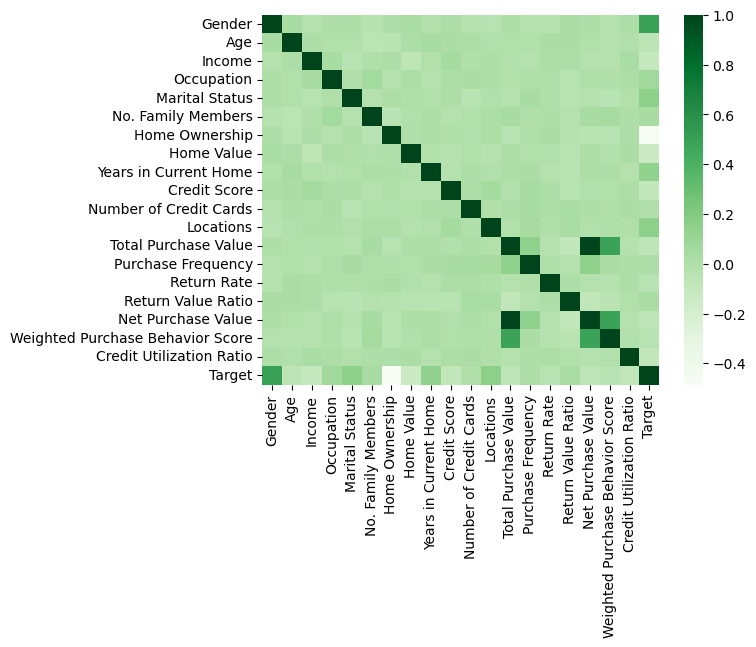

In [57]:
sns.heatmap(df_merged_test.corr(), cmap = "Greens")